## Markov Decision Process in Grid World

#### Ref: <https://github.com/SungchulLee/reinforcement_learning>

#### Problem
* In 3 by 4 grid world with wal (1,1) , goal (0,3) ,and fail (1,3)


#### States
0 1 2 3  
4 W 5 6  
7 8 9 10  

In [2]:
import numpy as np
nCols = 3
nRows = 4
nWalls = 1
states = []
for i in range(nCols*nRows-nWalls):
    states.append(i)
N_STATES = len(states)
print(states)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
# set map
map = -np.ones((nCols+2,nRows+2))
for i in range(nCols):
    for j in range(nRows):
        map[i+1,j+1] = 0
map[2,2] = -1 # add wall
print(map)

[[-1. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0. -1.]
 [-1.  0.  0.  0.  0. -1.]
 [-1. -1. -1. -1. -1. -1.]]


#### Actions
left: 0  
up: 1  
right: 2  
down: 3   

In [4]:
actions = [0, 1, 2, 3]
N_ACTIONS = len(actions)

#### Transition probability
  
  
* you move according to your actions with 80% prob
* you move may have a left and right one click error with 10% prob each
* if there is a barrier against your move, your move bounds back

In [5]:
# states -> location
locations = []
index = 0
for i in range(nCols):
    for j in range(nRows):
        if map[i+1,j+1]==0:
            locations.append((i+1,j+1))
            index = index + 1
print(locations) # match index with states
# action -> move
move = [(0,-1),(-1,0),(0,1),(1,0)] # match index with actions
print(move)

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4)]
[(0, -1), (-1, 0), (0, 1), (1, 0)]


In [6]:
P = np.zeros((N_STATES,N_ACTIONS,N_STATES)) # P[S,A,S']
for s in range(N_STATES):
    for a in range(N_ACTIONS):
        current_location = locations[s]
        # heading collectly  ####################################################################################
        next_location = (current_location[0] + move[a][0],current_location[1] + move[a][1])
        
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.8
        # left error ############################################################################################
        next_location = (current_location[0] + move[a-1][0],current_location[1] + move[a-1][1])
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.1
        # right error ############################################################################################
        next_location = (current_location[0] + move[(a+1)%4][0],current_location[1] + move[(a+1)%4][1])
        
        if map[next_location[0],next_location[1]] == -1: # there is barrier or wall
            next_location = current_location
            next_s = states[locations.index(next_location)]
        else:
            next_s = states[locations.index(next_location)]
        P[s,a,next_s] = P[s,a,next_s] + 0.1

In [7]:
# rewards s,a ---  R(s,a)  ---> s'
if True:
    R = -0.02*np.ones((N_STATES,N_ACTIONS))
else:
    R = -0.5*np.ones((N_STATES,N_ACTIONS))
R[3,:] = 1
R[6,:] = -1
print(R)

[[-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [ 1.    1.    1.    1.  ]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-1.   -1.   -1.   -1.  ]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]
 [-0.02 -0.02 -0.02 -0.02]]


In [8]:
# discount factor
gamma = 0.99

In [9]:
# policy : given state which action would u choose
# assume that we know the policy
bad_policy = np.zeros((N_STATES,N_ACTIONS))
bad_policy[0,2] = 1
bad_policy[1,2] = 1
bad_policy[2,2] = 1
bad_policy[3,2] = 1
bad_policy[4,3] = 1
bad_policy[5,2] = 1
bad_policy[6,2] = 1
bad_policy[7,2] = 1
bad_policy[8,2] = 1
bad_policy[9,2] = 1
bad_policy[10,1] = 1

In [10]:
random_policy = 0.25*np.ones((N_STATES,N_ACTIONS))

In [11]:
optimal_policy = np.zeros((N_STATES,N_ACTIONS))
optimal_policy[0,2] = 1
optimal_policy[1,2] = 1
optimal_policy[2,2] = 1
optimal_policy[3,2] = 1
optimal_policy[4,1] = 1
optimal_policy[5,1] = 1
optimal_policy[6,1] = 1
optimal_policy[7,1] = 1
optimal_policy[8,0] = 1
optimal_policy[9,0] = 1
optimal_policy[10,0] = 1

In [12]:
optimalWithNoise_policy = np.zeros((N_STATES,N_ACTIONS))
ep = 0.1
optimalWithNoise_policy[0,2] = 1
optimalWithNoise_policy[1,2] = 1
optimalWithNoise_policy[2,2] = 1
optimalWithNoise_policy[3,2] = 1
optimalWithNoise_policy[4,1] = 1
optimalWithNoise_policy[5,1] = 1
optimalWithNoise_policy[6,1] = 1
optimalWithNoise_policy[7,1] = 1
optimalWithNoise_policy[8,0] = 1
optimalWithNoise_policy[9,0] = 1
optimalWithNoise_policy[10,0] = 1
optimalWithNoise_policy = optimalWithNoise_policy + (ep/4)*np.ones((N_STATES,N_ACTIONS))
optimalWithNoise_policy = optimalWithNoise_policy / np.sum(optimalWithNoise_policy,axis = 1).reshape((N_STATES,1))

In [33]:
# simulation
success_history = []
epoch = 1000
msg = "s: {:2}, a: {}, r: {:5.2f}, sl: {:2}, done: {:1}, info: {:0.2f}"
for _ in range(epoch):
    done = False
    s = np.random.choice([x for x in states if x !=[3,6]])
    while not done:
        # by policy
        #a = np.random.choice(actions,p = bad_policy[s,:])
        #a = np.random.choice(actions,p = random_policy[s,:])
        a = np.random.choice(actions,p = optimal_policy[s,:])
        #a = np.random.choice(actions,p = optimalWithNoise_policy[s,:])
        
        #prob = bad_policy[s,a]
        #prob = random_policy[s,a]
        prob = optimal_policy[s,a]
        #prob = optimalWithNoise_policy[s,a]
        
        s1 = np.random.choice(states, p=P[s,a,:])
        if s1 == 3: # terminal states with succes
            done = True
            print(msg.format(s,a,R[s,a],s1,done,prob))
            success_history.append(1)
            print("succes")
        elif s1 == 6: # terminal states with failure
            done = True
            print(msg.format(s,a,R[s,a],s1,done,prob))
            print("failure")
            success_history.append(0)
        else:
            print(msg.format(s,a,R[s,a],s1,done,prob))
            s = s1


s: 10, a: 0, r: -0.02, sl:  9, done: 0, info: 1.00
s:  9, a: 0, r: -0.02, sl:  9, done: 0, info: 1.00
s:  9, a: 0, r: -0.02, sl:  5, done: 0, info: 1.00
s:  5, a: 1, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  6, a: 1, r: -1.00, sl:  3, done: 1, info: 1.00
succes
s:  6, a: 1, r: -1.00, sl:  3, done: 1, info: 1.00
succes
s:  9, a: 0, r: -0.02, sl:  8, done: 0, info: 1.00
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  6, a: 1, r: -1.00, sl:  3, done: 1, info: 1.00
succes
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1

s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  1, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  5, a: 1, r: -0.02, sl:  5, done: 0, info: 1.00
s:  5, a: 1, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  9, a: 0, r: -0.02, sl:  8, done: 0, info: 1.00
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  4, done: 0, 

s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  9, a: 0, r: -0.02, sl:  8, done: 0, info: 1.00
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  4, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  9, a: 

s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  9, a: 0, r: -0.02, sl:  8, done: 0, info: 1.00
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s: 

s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s: 10, a: 0, r: -0.02, sl:  9, done: 0, info: 1.00
s:  9, a: 0, r: -0.02, sl:  8, done: 0, info: 1.00
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 

s:  5, a: 1, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  7, a: 1, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  8, done: 0, info: 1.00
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  2, a: 2, r: -0.02, sl:  3, done: 1, info: 1.00
succes
s:  8, a: 0, r: -0.02, sl:  7, done: 0, info: 1.00
s:  7, a: 1, r: -0.02, sl:  4, done: 0, info: 1.00
s:  4, a: 1, r: -0.02, sl:  0, done: 0, info: 1.00
s:  0, a: 2, r: -0.02, sl:  1, done: 0, info: 1.00
s:  1, a: 2, r: -0.02, sl:  2, done: 0, info: 1.00
s: 

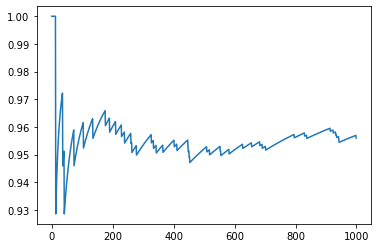

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
history = np.cumsum(success_history,axis =0)/np.cumsum(np.ones(epoch),axis=0)
#print(history)
plt.plot(history)
